In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf



# Looking for Data Science Jobs in North America? Here Are Some Things You Should Know
### from the [Kaggle Machine Learning & Data Sicnece Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020)  

<a id="table-of-contents"></a>

1.  [Introduction](#introduction)
2.  [Data Preparation](#preparation)
3.  [Meet the Data Professionals](#meet)
    * 3.1. [Discover the Data Professionals: Gender, Age and Compensation](#meet-discovery)
    * 3.2. [Different Titles, Different Activities](#meet-activities)
    * 3.3. [Different Titles, Different Experience](#meet-experience)
5. [Want to Spark Up Your Data Skills?](#skills)
6. [What Is the Top Recommendations from Kagglers](#recommendations) 
7. [Take-Aways](#takeaways)
8. [References](#reference)

<a id="introduction"></a>
[back to top](#table-of-contents)

# 1. Introduction

### Are you one of the data science enthusiasts? If so, you probably have questions similar to what I have because there are different kinds of job positions in professional data fields. Without understanding each job title, you would not know where to start. Let's take a look at who really are the data professionals currently working in North America, then build up the list of the required skills and take away some practical tips from them. 


<!-- ![main-image](magnet-me-LDcC7aCWVlo-unsplash.jpg) -->
<img src="https://images.unsplash.com/photo-1598257006626-48b0c252070d?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1950&q=80">
<span>Photo by <a href="https://unsplash.com/@magnetme?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Magnet.me</a> on <a href="https://unsplash.com/s/photos/data-professional?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>


<a id="preparation"></a>
[back to top](#table-of-contents)

## 2. Data Preparation

In this section, let's shape the original dataset "[Kaggle Machine Learning & Data Sicnece Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020)" into our working data frame. Although it is a well-formatted dataset, we need to modify some part of it to draw some findings related to our questions as following points: 
- The survey questions in the data frame are located at the top row --> need to be deleted 
- The first column of the data frame(Survey Duration) is not relevant info --> need to be deleted  
- Multiple choice responses are already distributed into each columns --> no need to process
- Note that all columns (survey questions) are categorical variables
- **This analysis includs only NorthAmerican Data Professionals** --> need to filter out any observations gathered from students or undemployed ones as well as outside of North America

Originally, the dataset has 20036 observations and 355 columns(1 Duration, 18 single-choice-questions, and 336 multiple-choice-questions) but after preparation, the final  data frame has 1909 observations and 354 columns. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns 
%matplotlib inline

plt.rcParams['figure.dpi'] = 200 #high resolution

In [3]:
# read dataset to Pandas Data Frame
# df_raw = pd.read_csv(r"C:\Users\suhon\Documents\Data Scientist Nanodegree\KaggleSurvey2020-Analysis\kaggle-survey-2020\kaggle_survey_2020_responses.csv")
df_raw = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

# check the basic information 
print(df_raw.info())

# check the number of single choice questions
columns_single = df.filter(regex="^(?!.*Part)(?!.*OTHER)").columns
#df[columns_single].describe()
print(f"\nNumber of single choice questions: {columns_single.shape[0]}") 

# check the number of multiple choice questions
columns_multiple = df.filter(regex="^(?=.*Part)|(?=.*OTHER)").columns
#df[columns_multiple].describe()
print(f"\nNumber of multiple choice questions: {columns_multiple.shape[0]}")


df_raw.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB
None


NameError: name 'df' is not defined

In [4]:
"""format the data frame"""

# delete the first row and save it into the list 
list_questions = list(df_raw.iloc[0])
df = df_raw.drop(df_raw.index[0], axis=0)

# delete the first column 
df.drop(columns=df.columns[0], axis=1, inplace=True)

# only include current data professionals
q5_order = [
    'Business Analyst',
    'Data Analyst', 
    'Data Engineer',
    'Data Scientist', 
    'DBA/Database Engineer',
    'Machine Learning Engineer',
    'Product/Project Manager',
    'Research Scientist',
    'Software Engineer',
    'Statistician',
    # 'Student', 
    # 'Currently not employed', 
    'Other']

# only include developers in North America 
# df['Q3'].value_counts()
q3_order = [
    'United States of America', 
    'Canada']

# only include North America: US and Canada 
df = df[df['Q5'].isin(q5_order) & df['Q3'].isin(q3_order)]
# df['Q3'].value_counts()

# print the prepared data frame 
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 2 to 20007
Columns: 354 entries, Q1 to Q35_B_OTHER
dtypes: object(354)
memory usage: 5.2+ MB
None


,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
8390,30-34,Woman,United States of America,Master’s degree,Software Engineer,10-20 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10440,35-39,Woman,United States of America,Doctoral degree,Machine Learning Engineer,5-10 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,45-49,Woman,United States of America,Master’s degree,Data Scientist,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3781,30-34,Man,United States of America,Doctoral degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
14663,50-54,Prefer not to say,United States of America,Master’s degree,Software Engineer,20+ years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="meet"></a>
[back to top](#table-of-contents)

# 3. Meet the Data Professionals
We are data enthusiasts, so let's meet the working professionals via thier data! First, you can explore some basic statistics of the data collection across different data job fields (3.1. [Discover the Data Professionals: Gender, Age and Compensation](#meet-discovery)). Then, you will get a better understanding of each position by comparing the proportion of their activities (3.2. [Different Titles, Different Activities](#meet-activities)). Finally, you can look over what kinds of education and experience are preferred by each data job (3.3. [Different Titles, Different Experience](#meet-experience))

<a id="meet-discovery"></a>
## 3.1. Discover the Data Professionals: Gender, Age and Compensation

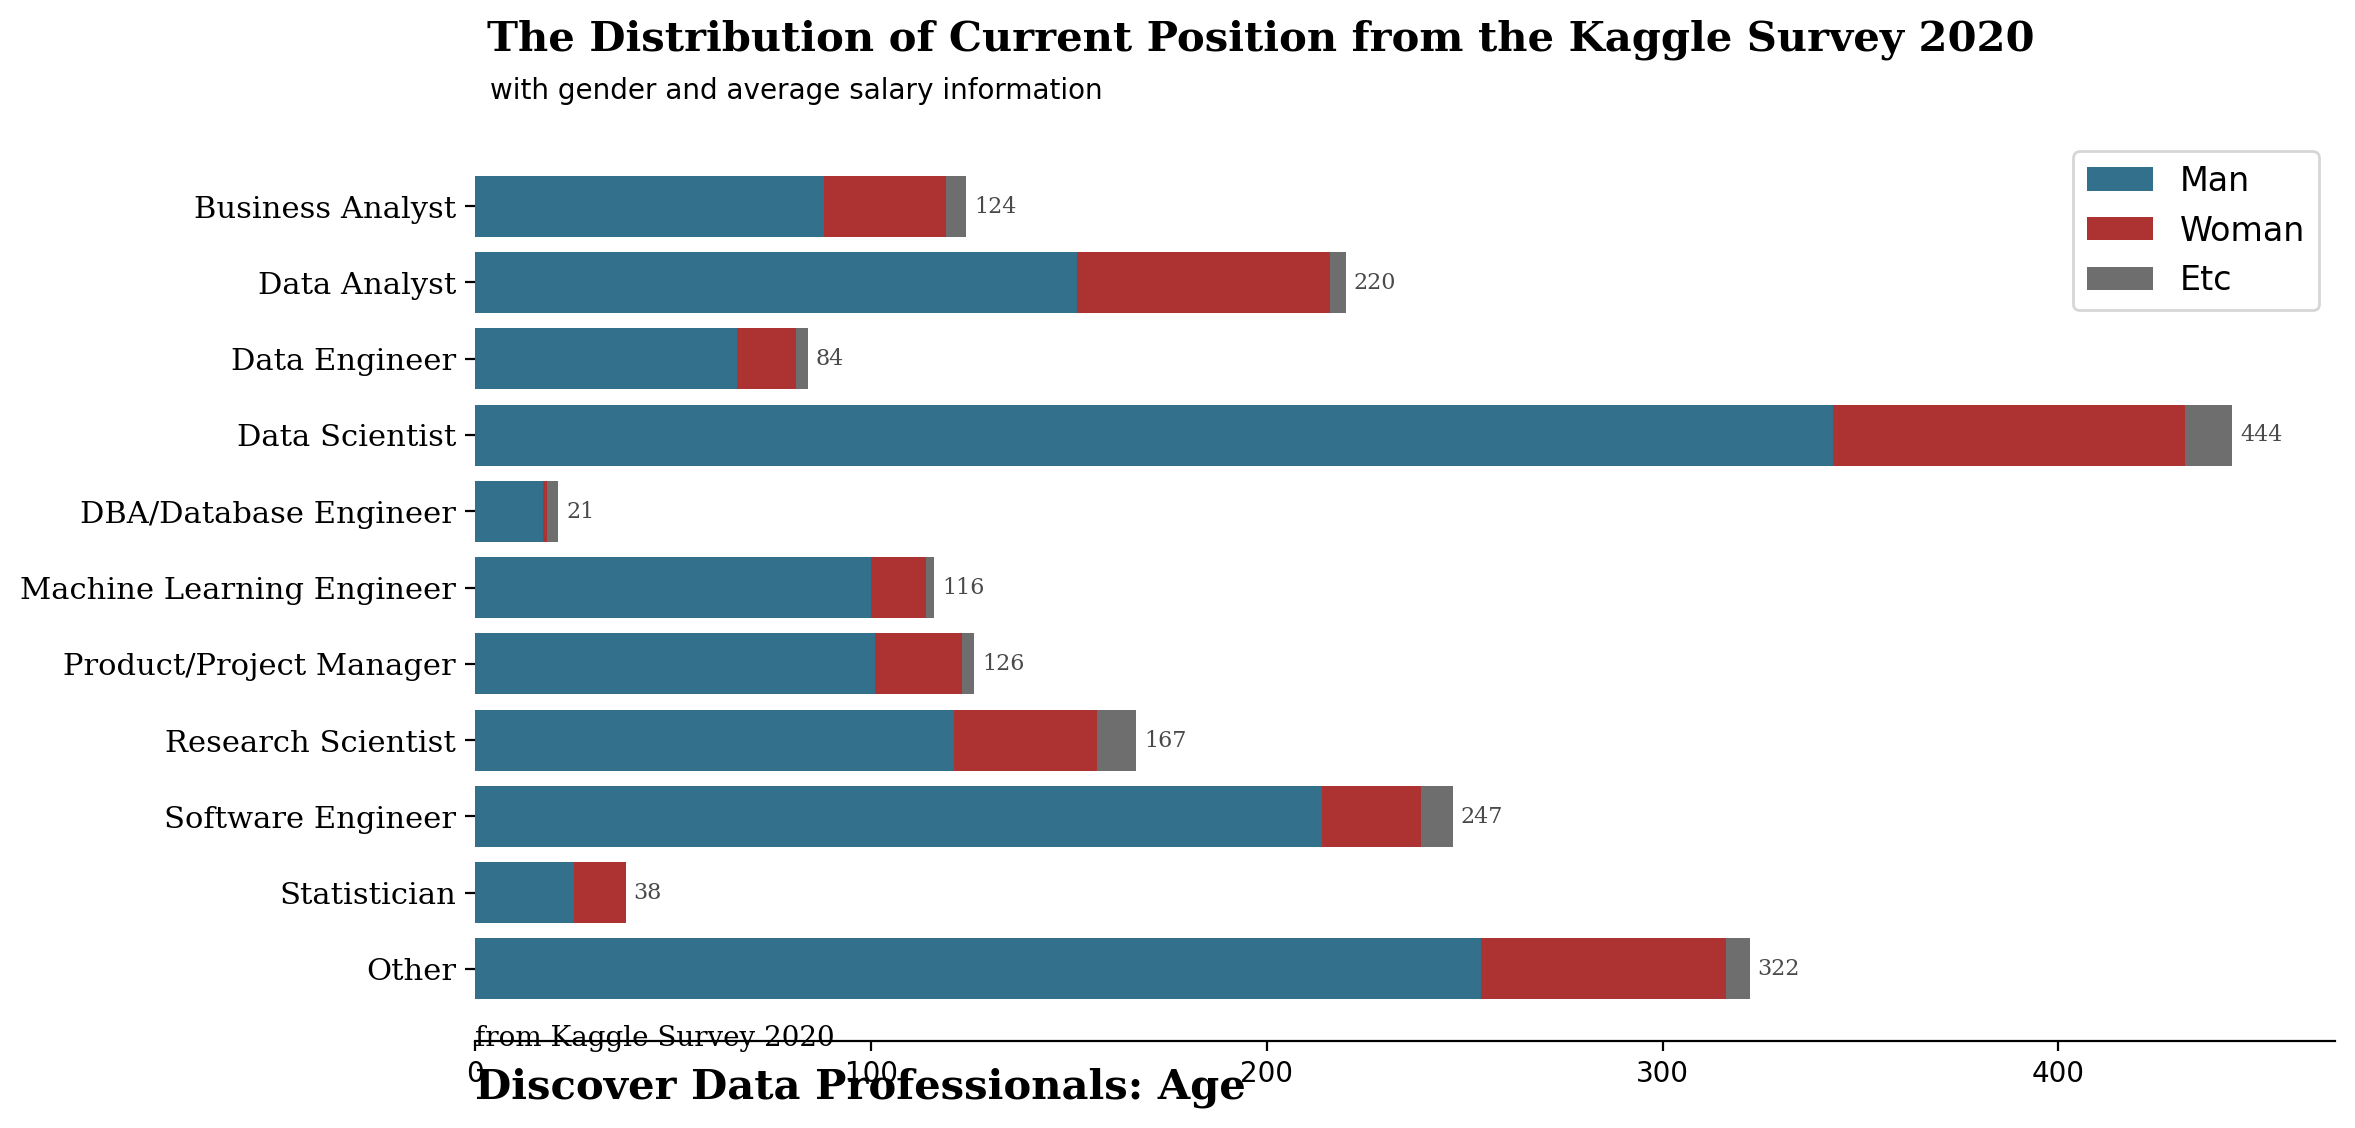

In [5]:
# join gender and jobtitle data 
df_q5q2 = df[['Q2','Q5']].groupby('Q5')['Q2'].value_counts().unstack().loc[q5_order[::-1]] # order is upside down when plotting a bar chart
df_q5q2['total'] = df_q5q2.sum(axis=1)

# group gender categries into ['Man', 'Woman', 'Etc']
etc_columns = [x for x in df['Q2'].unique() if x not in ['Man', 'Woman']]
df_q5q2['Etc'] = df_q5q2[etc_columns].sum(axis=1)
df_q5q2.drop(columns=etc_columns, axis=1, inplace=True)


# join Age and jobtitle data 
df_q5q1 = df[['Q1','Q5']].groupby('Q5')['Q1'].value_counts().unstack().loc[q5_order[::-1]]

# plot barchart 
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.barh(df_q5q2.index, df_q5q2['Man'], color='#004c70', alpha=0.8, label='Man')
ax.barh(df_q5q2.index, df_q5q2['Woman'], left=df_q5q2['Man'], color='#990000', alpha=0.8, label='Woman')
ax.barh(df_q5q2.index, df_q5q2['Etc'], left=df_q5q2['Man']+df_q5q2['Woman'], color='#4a4a4a', alpha=0.8, label='Etc')

ax.set_xlim(0, 470)
# ax0.set_ylabel("")
ax.text(0, -1.7, 'Discover Data Professionals: Age', 
         fontsize=15, fontweight='bold', fontfamily='serif')
ax.text(0, -1, 'from Kaggle Survey 2020', 
        fontsize=10, fontweight='light', fontfamily='serif')

# ax0.set_ylabel(""))
# ax.set_xticklabels(range(0,451,50), fontfamily='serif', fontsize=11)
ax.set_yticklabels(df_q5q2.index, fontfamily='serif', fontsize=11)


for i in df_q5q2.index: 
    ax.annotate(f"{df_q5q2['total'][i]:.0f}",
                xy=(df_q5q2['total'][i]+2, i), 
                va = 'center', ha='left', fontweight='light', fontfamily='serif',
                color='#4a4a4a', fontsize=8)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

fig.text(0.13, 0.95, 'The Distribution of Current Position from the Kaggle Survey 2020', 
            fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'with gender and average salary information')
ax.legend(prop=dict(size=12))
plt.show()


Text(0, -1, 'from Kaggle Survey 2020')

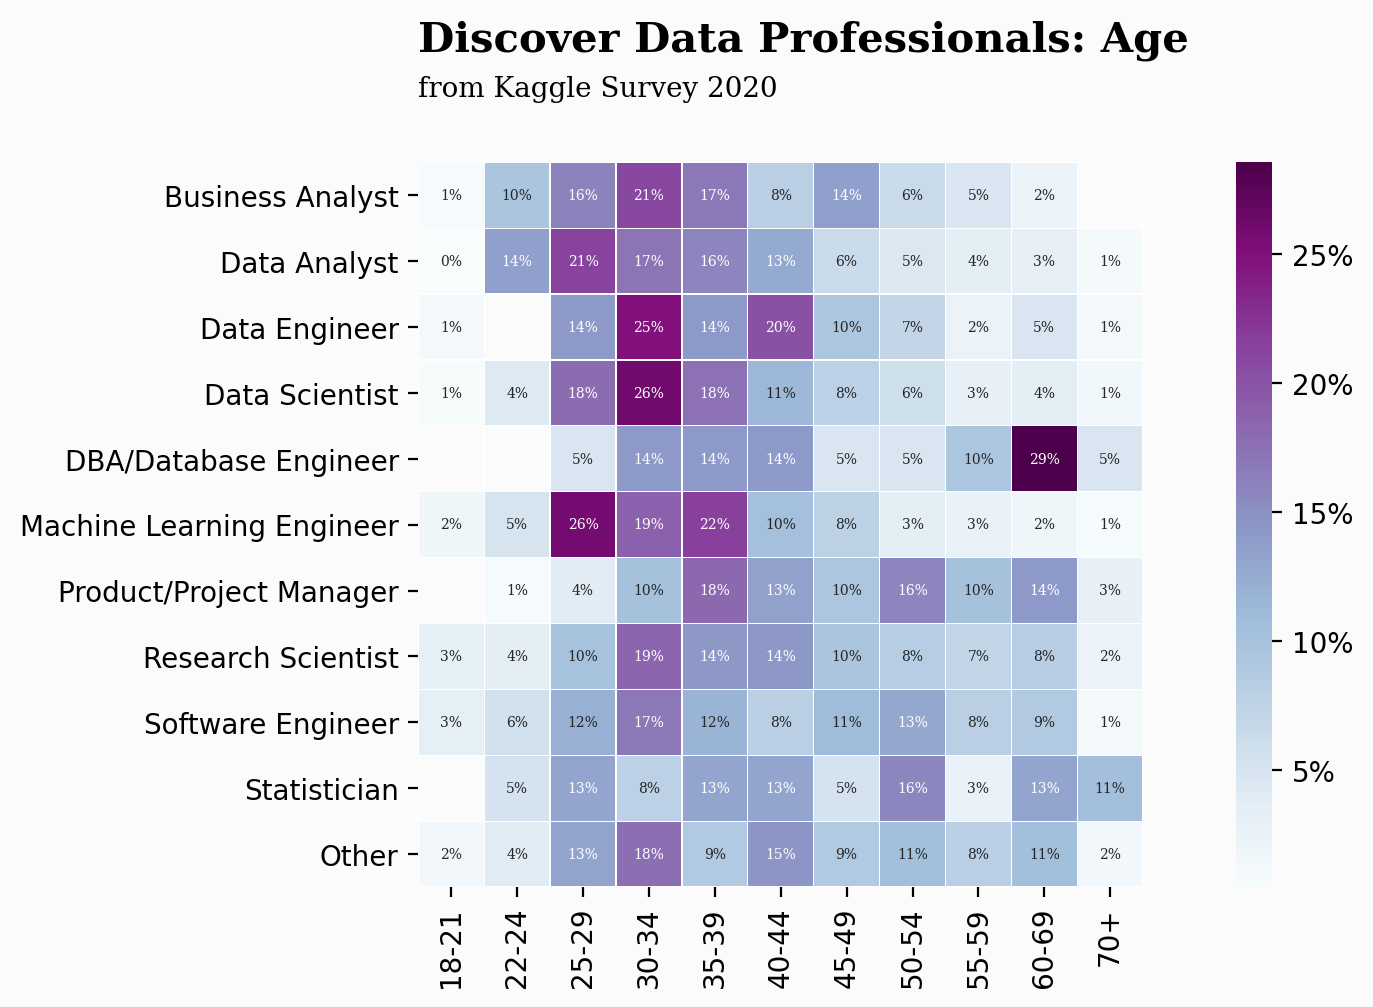

In [6]:
df_q5q1 = df[['Q1','Q5']].groupby('Q5')['Q1'].value_counts().unstack().loc[q5_order]
df_q5q1 = (df_q5q1.T / (df_q5q1.sum(axis=1) + 0.001)).T # convert it into ratio 

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=-0.75)
ax0 = fig.add_subplot(gs[0,0])

cbar_fmt = lambda x,pos: f'{x:.0%}'
ax_heat = sns.heatmap(ax=ax0, data=df_q5q1, linewidths=.1, square=True, cmap='BuPu',
            annot=True, fmt='.0%', annot_kws=dict(size=5, fontfamily='serif'),
            cbar_kws=dict(format=FuncFormatter(cbar_fmt), use_gridspec=False, location="right"))
# resize the ticklabels 
# ax_heat.set_xticklabels(ax_heat.get_xmajorticklabels(), fontsize=7, fontfamily='serif')
# ax_heat.set_yticklabels(ax_heat.get_ymajorticklabels(), fontsize=7, fontfamily='serif')

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.text(0, -1.7, 'Discover Data Professionals: Age', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax0.text(0, -1, 'from Kaggle Survey 2020', 
         fontsize=10, fontweight='light', fontfamily='serif')

# for s in ["top","right","left"]:
#     ax0.spines[s].set_visible(False)



<a id="jobtitles-activites"></a>
[back to top](#table-of-contents)

### 3. Different titles, different activities

In [7]:
q23_map = {'Analysis':'Analyze and understand data to influence product or business decisions',
            'Data Infrastructure':'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 
            'Prototyping':'Build prototypes to explore applying machine learning to new areas', 
            'Machine Learning':'Build and/or run a machine learning service that operationally improves my product or workflows', 
            'Experiments':'Experimentation and iteration to improve existing ML models', 
            'Research':'Do research that advances the state of the art of machine learning', 
            'None':'None of these activities are an important part of my role at work', 
            'Other':'Other'}

q23_col_map = { 'Q23_Part_1':'Analysis', 
                'Q23_Part_2':'Data Infrastructure', 
                'Q23_Part_3':'Prototyping',
                'Q23_Part_4':'Machine Learning', 
                'Q23_Part_5':'Experiments', 
                'Q23_Part_6':'Research', 
                'Q23_Part_7':'None', 
                'Q23_OTHER':'Other'}


# change the value of columns related to Q23 to short name and numerical value to count
df_q23 = df.filter(regex="^(?=.*Q23)").rename(columns=q23_col_map).copy()
df_q23.fillna(0, inplace=True)
df_q23.replace(to_replace=list(q23_map.values()), value=1, inplace=True)

# combine Q5 with Q23 
df_q5q23 = pd.concat([df[['Q5']], df_q23], axis=1).groupby('Q5').sum().loc[q5_order].T
# add a total 
df_q5q23['All Kagglers'] = df_q5q23.sum(axis=1)
df_q5q23 = df_q5q23[['All Kagglers']+q5_order] # change the order 
# combine 'Other' and 'None'
df_q5q23.loc['Other'] += df_q5q23.loc['None'] 
df_q5q23.drop('None', axis=0, inplace=True)
df_q5q23.head(20)

Q5,All Kagglers,Business Analyst,Data Analyst,Data Engineer,Data Scientist,DBA/Database Engineer,Machine Learning Engineer,Product/Project Manager,Research Scientist,Software Engineer,Statistician,Other
Analysis,1160,89,181,54,356,7,60,67,76,93,21,156
Data Infrastructure,675,41,78,57,194,11,57,31,38,88,11,69
Prototyping,792,20,48,31,312,5,79,38,89,72,10,88
Machine Learning,466,14,27,19,196,1,64,22,32,44,6,41
Experiments,605,8,29,20,246,3,74,25,70,56,10,64
Research,323,6,16,9,98,1,41,14,70,25,8,35
Other,294,14,13,3,15,4,6,27,28,70,7,107


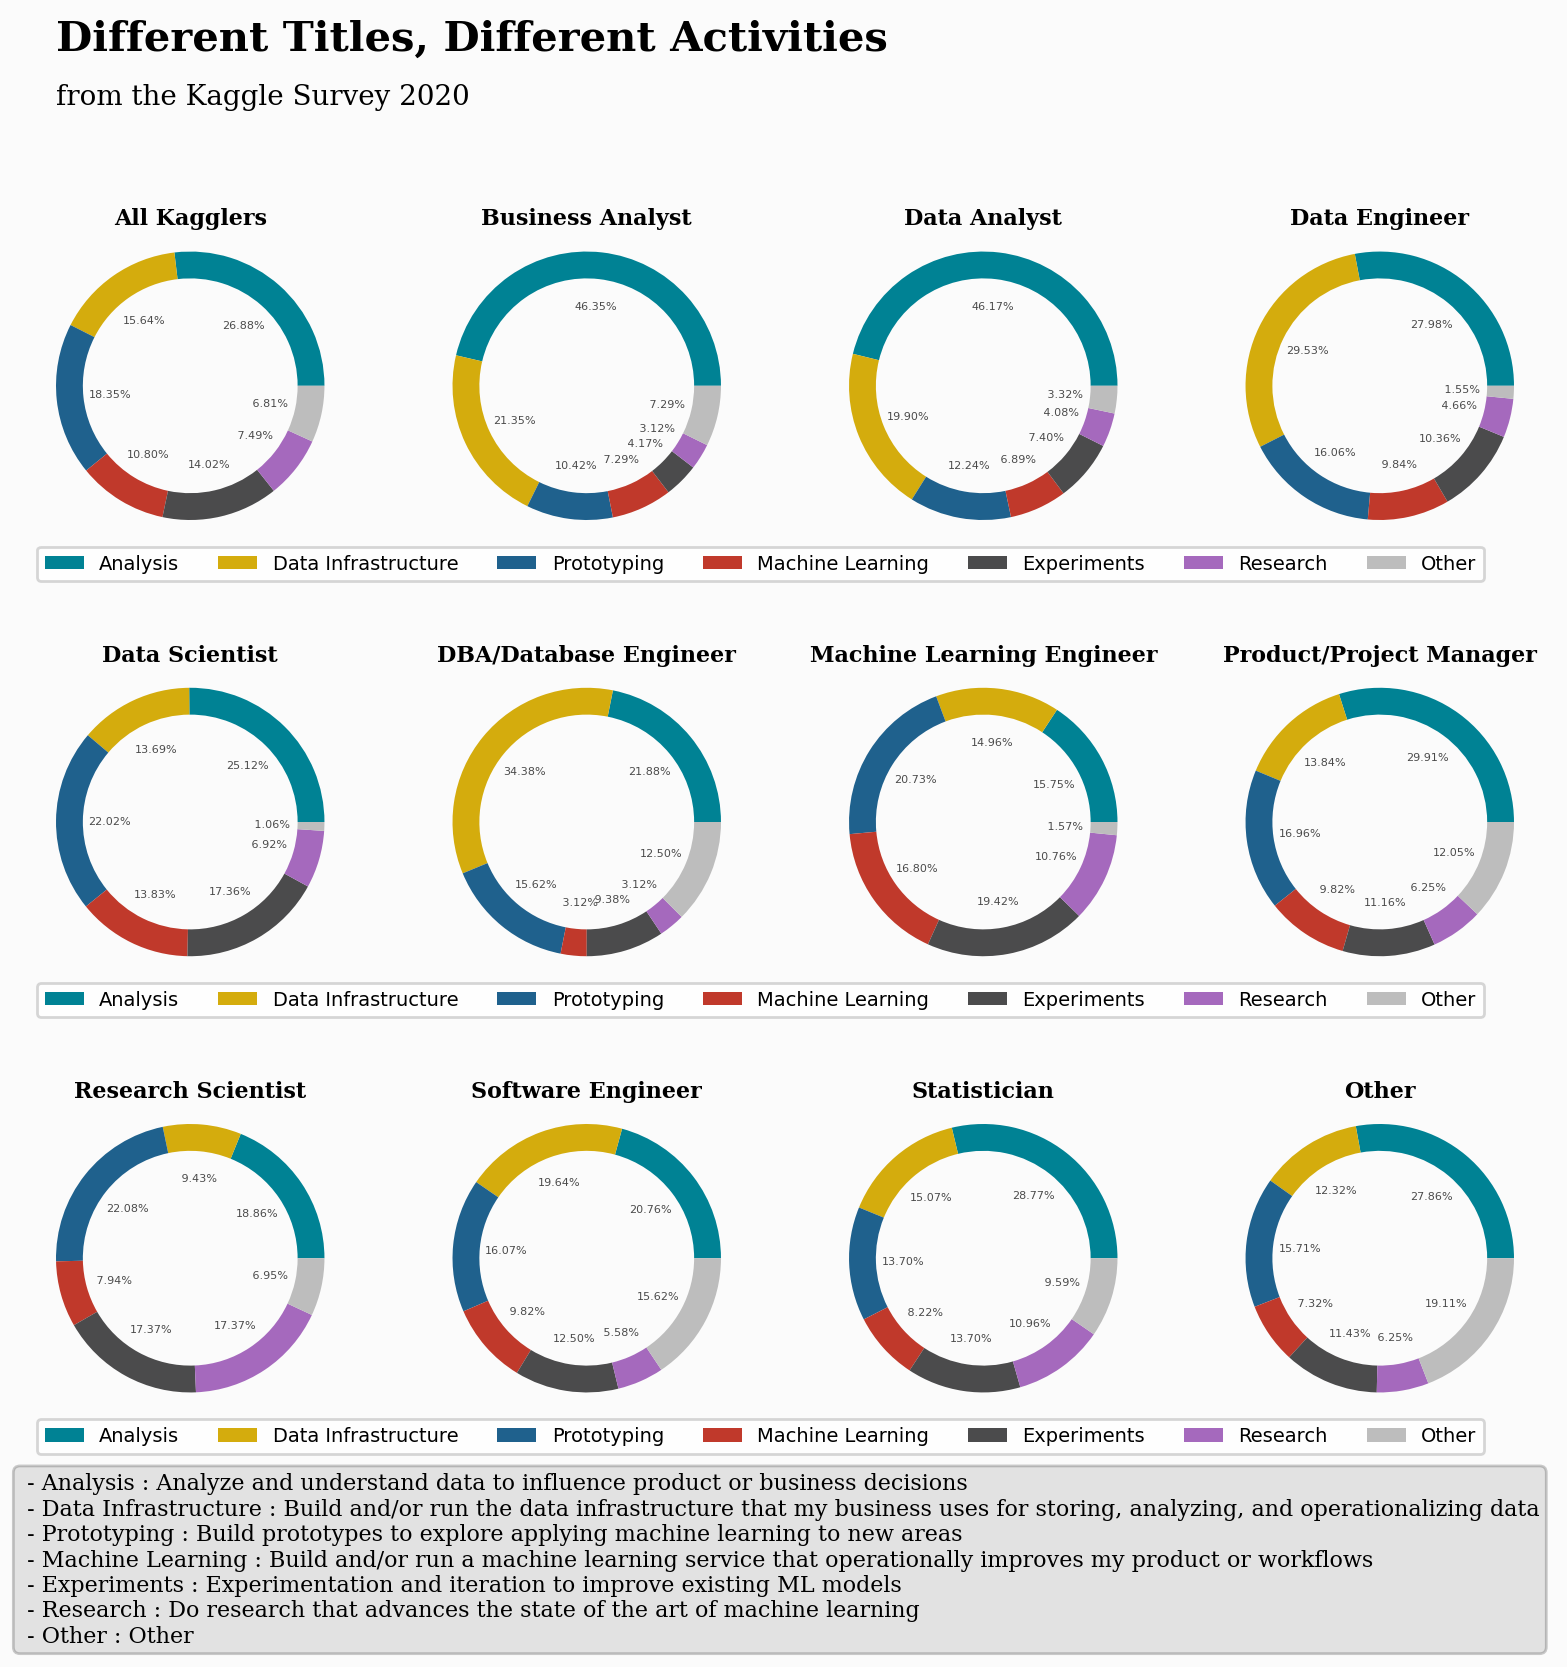

In [8]:
# Pie Figure 

# configure the grid size 
fig = plt.figure(figsize=(10,8)) 
gs_w, gs_h = 3, 4
gs = fig.add_gridspec(gs_w, gs_h)
gs.update(wspace=0.1, hspace=0.3) 
axes = []
for i in range(gs_w):
    for j in range(gs_h): 
        axes.append(fig.add_subplot(gs[i, j]))

# draw a pie chart
color_map = ["#008294", "#d4ac0d", "#1f618d", "#c0392b", "#4b4b4c", "#A569BD","#bdbdbd"]
fig.patch.set_facecolor('#fbfbfb')
for i in range(gs_w * gs_h): 
    # wedges, texts =  axes[i].pie(x=df_q5q23.iloc[:, i], colors=color_map, wedgeprops=dict(width=0.2)) # plain
    wedges, texts, autotexts =  axes[i].pie(x=df_q5q23.iloc[:, i], colors=color_map, wedgeprops=dict(width=0.2), 
                                            autopct=lambda pct: f"{pct:5.2f}%", textprops=dict(color="#4a4a4a", fontsize=4))
    axes[i].text(0, 1.2, df_q5q23.columns[i], fontsize=8, fontweight='bold', fontfamily='serif', horizontalalignment='center')
    axes[i].set_facecolor('#fbfbfb')


# configure texts in graph 
axes[0].text(-1., 2.5, 'Different Titles, Different Activities', fontsize=15, fontweight='bold', fontfamily='serif')
axes[0].text(-1., 2.1, 'from the Kaggle Survey 2020', fontsize=10, fontweight='light', fontfamily='serif')
axes[0].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)
axes[4].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)
axes[8].legend(wedges, df_q5q23.index,  bbox_to_anchor=(2.2, 0.05), loc="upper center", ncol=7, fontsize=7)

fig.text(0.13, -0.01, "\n".join([f" - {k} : {q23_map[k]}" for k in df_q5q23.index]), 
            fontsize=8, fontweight='light', fontfamily='serif', 
            bbox=dict(boxstyle='round', facecolor='gray', alpha=0.2))
print()

<a id="jobtitles-career"></a>
[back to top](#table-of-contents)

### 3.2. [Different titles, different career path](#jobtitles-career)

In [9]:
df[['Q4', 'Q5', 'Q6', 'Q15']].describe() # edu, programming, ml 

# Q6 and Q15 -> modify values of Q15 to match with Q6
#  to give a better comparision 
#  [notice] 'I do not use machine learning methods' -> '0 year' in both Q6, 15
# Q6: 0, <1, 1-2, 3-5, 5-10, 10-20, 20+
# Q15: 0, <1, (1-2, 2-3), (3-4, 4-5), 5-10, 10-20, 20+

q6q15_order = ['0 year', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

df_q6 = df[['Q6']].replace('I have never written code', q6q15_order[0])
df_q15 = df[['Q15']].replace({'I do not use machine learning methods':q6q15_order[0],
                                'Under 1 year':q6q15_order[1], 
                                '2-3 years':q6q15_order[2], 
                                '3-4 years':q6q15_order[3], 
                                '4-5 years':q6q15_order[3], 
                                '20 or more years':q6q15_order[6]})

# combine Q5-Q15 
df_q5q15 = pd.concat([df[['Q5']], df_q15], axis=1)
df_q5q15 = df_q5q15.groupby('Q5')['Q15'].value_counts().unstack().loc[q5_order][q6q15_order]
df_q5q15.fillna(0., inplace=True)

# combine Q5-Q6
df_q5q6 = pd.concat([df[['Q5']], df_q6], axis=1)
df_q5q6 = df_q5q6.groupby('Q5')['Q6'].value_counts().unstack().loc[q5_order][q6q15_order]
df_q5q6.fillna(0., inplace=True)

# combine Q5-Q4 
q4_order = ['No Formal Edu.', 'Diploma', 'Bachelor', 'Master', 'PhD', 'Professional', 'Not to Answer']
q4_map = {'No formal education past high school':q4_order[0], 
            'Some college/university study without earning a bachelor’s degree':q4_order[1], 
            'Bachelor’s degree':q4_order[2], 
            'Master’s degree':q4_order[3], 
            'Doctoral degree':q4_order[4], 
            'Professional degree':q4_order[5], 
            'I prefer not to answer':q4_order[6]}

df_q4 = df[['Q4']].replace(q4_map)
df_q5q4 = pd.concat([df[['Q5']], df_q4], axis=1)
df_q5q4 = df_q5q4.groupby('Q5')['Q4'].value_counts().unstack().loc[q5_order][q4_order]
df_q5q4.fillna(0., inplace=True)
df_q5q4['sum'] = df_q5q4.sum(axis=1)
df_q5q4_ratio = (df_q5q4.T / df_q5q4['sum']).T
df_q5q4_ratio.drop(columns='sum', axis=1, inplace=True)
df_q5q4_ratio.cumsum(axis=1)
# Q4 : no degree, diploma, bachelor, master, doctor, professional, not to answer.  





Q4,No Formal Edu.,Diploma,Bachelor,Master,PhD,Professional,Not to Answer
Q5,,,,,,,
Business Analyst,0.016129,0.032258,0.346774,0.959677,0.967742,1.000000,1.0
Data Analyst,0.004545,0.050000,0.322727,0.927273,0.972727,0.995455,1.0
Data Engineer,0.000000,0.011905,0.285714,0.904762,0.988095,0.988095,1.0
Data Scientist,0.000000,0.009009,0.162162,0.689189,0.981982,1.000000,1.0
DBA/Database Engineer,0.000000,0.047619,0.380952,0.952381,0.952381,0.952381,1.0
Machine Learning Engineer,0.000000,0.068966,0.250000,0.801724,0.982759,1.000000,1.0
Product/Project Manager,0.000000,0.023810,0.309524,0.904762,0.968254,0.992063,1.0
Research Scientist,0.000000,0.011976,0.077844,0.293413,0.946108,0.976048,1.0
Software Engineer,0.012146,0.113360,0.469636,0.906883,0.971660,0.991903,1.0


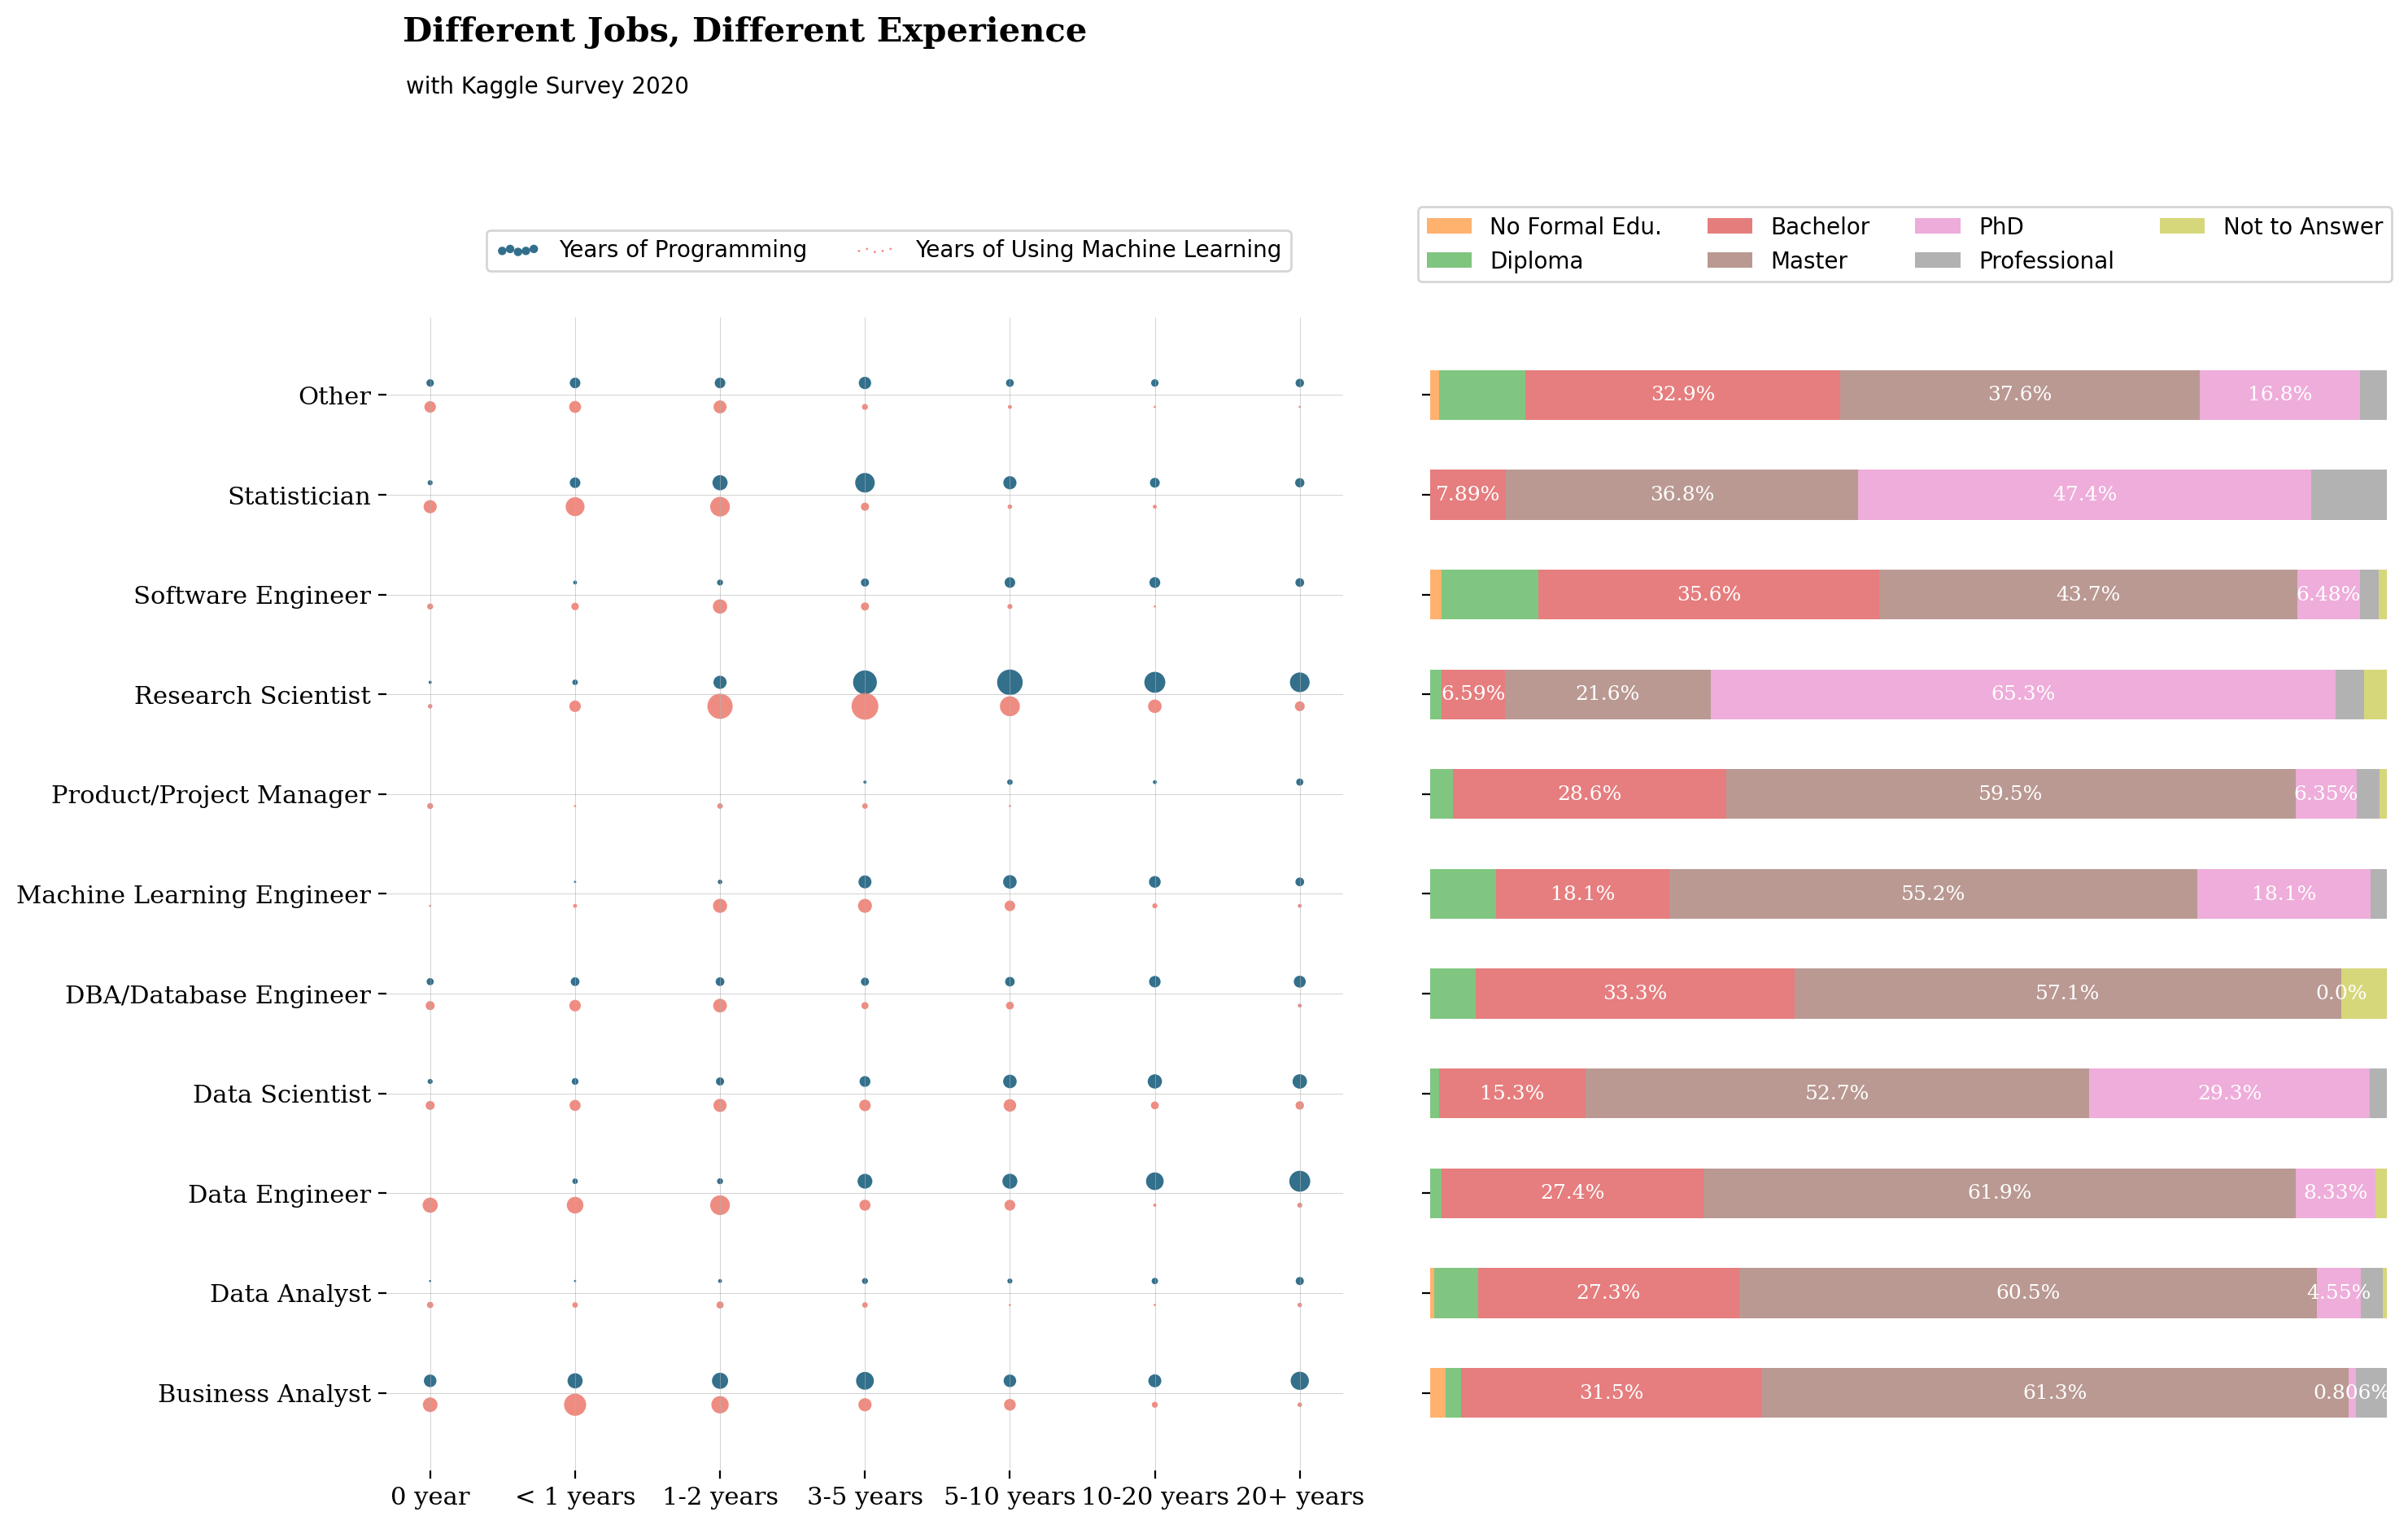

In [10]:
# set figure 
fig = plt.figure(figsize=(20, 16), dpi=200)
gs = fig.add_gridspec(5,5)

# Q5-Q6,Q15 graph (left)

df_q5q6 = df_q5q6.loc[list(df_q5q6.index)[::-1]] # invert the order of rows 

ax_plot = fig.add_subplot(gs[1:4, 0:2])
for y, q5_idx in enumerate(df_q5q6.index): 
    for x, q6q15_idx in enumerate(df_q5q6.columns): 
        sc_q6 = ax_plot.scatter(x, y+0.12, s=df_q5q6.loc[q5_idx, q6q15_idx], color='#004c70', alpha=0.8, marker='o', edgecolors='none')
        sc_q15 = ax_plot.scatter(x, y-0.12, s=df_q5q15.loc[q5_idx, q6q15_idx], color='#ec7063', alpha=0.8, marker='o', edgecolors='none')
    
ax_plot.grid(linewidth=0.2, zorder=0)
ax_plot.set_yticks(range(len(df_q5q6.index)))
ax_plot.set_yticklabels(df_q5q6.index, fontfamily='serif', fontsize=11)
ax_plot.set_xticks(range(len(df_q5q6.columns)))
ax_plot.set_xticklabels(df_q5q6.columns, fontfamily='serif', fontsize=11)
ax_plot.legend((sc_q6, sc_q15), ('Years of Programming', 'Years of Using Machine Learning'), scatterpoints=5, 
                bbox_to_anchor=(0.95, 1.08), loc="upper right", borderaxespad=0.2, ncol=2)
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)


# Q5-Q4 graph (right)
ax_plot2 = fig.add_subplot(gs[1:4, 2:4], sharey=ax_plot)
# color_map = ["#d5dbdb", "#d7bde2", "#f5b7b1", "#aed6f1", "#f9e79f", "#a2d9ce", "#aeb6bf"]
color_map = plt.get_cmap('tab10')(np.linspace(0.15, 0.85, df_q5q4_ratio.shape[1]))
df_q5q4_cumsum = df_q5q4_ratio.cumsum(axis=1)

for col, cr in zip(df_q5q4_ratio.columns, color_map):
    start = df_q5q4_cumsum[col] - df_q5q4_ratio[col]
    ax_plot2.barh(df_q5q4_ratio.index, df_q5q4_ratio[col], left=start, height=0.5, color=cr, alpha=0.6, label=col)

for i in df_q5q4_ratio.index: 
    for col in ['Bachelor', 'Master', 'PhD']:
        ax_plot2.annotate(f"{df_q5q4_ratio[col][i]*100:.3}%", 
                            xy=(df_q5q4_cumsum[col][i]-(df_q5q4_ratio[col][i]/2), i), 
                            va='center', ha='center', fontsize=9, fontweight='light', 
                            fontfamily='serif', color='white')

ax_plot2.set_xlim(0,1)
ax_plot2.set_xticks([])
plt.setp(ax_plot2.get_yticklabels(), visible=False)
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot2.spines[s].set_visible(False)
    
ax_plot2.legend( bbox_to_anchor=(1.01, 1.1), loc="upper right", borderaxespad=0.2, ncol=4)



fig.text(0.13, 0.83, 'Different Jobs, Different Experience', 
            fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.81, 'with Kaggle Survey 2020 ')
plt.show()

<a id="jobtitles-compensation"></a>
[back to top](#table-of-contents)

### 3.3. [Who makes more money?](#jobtitles-compensation)

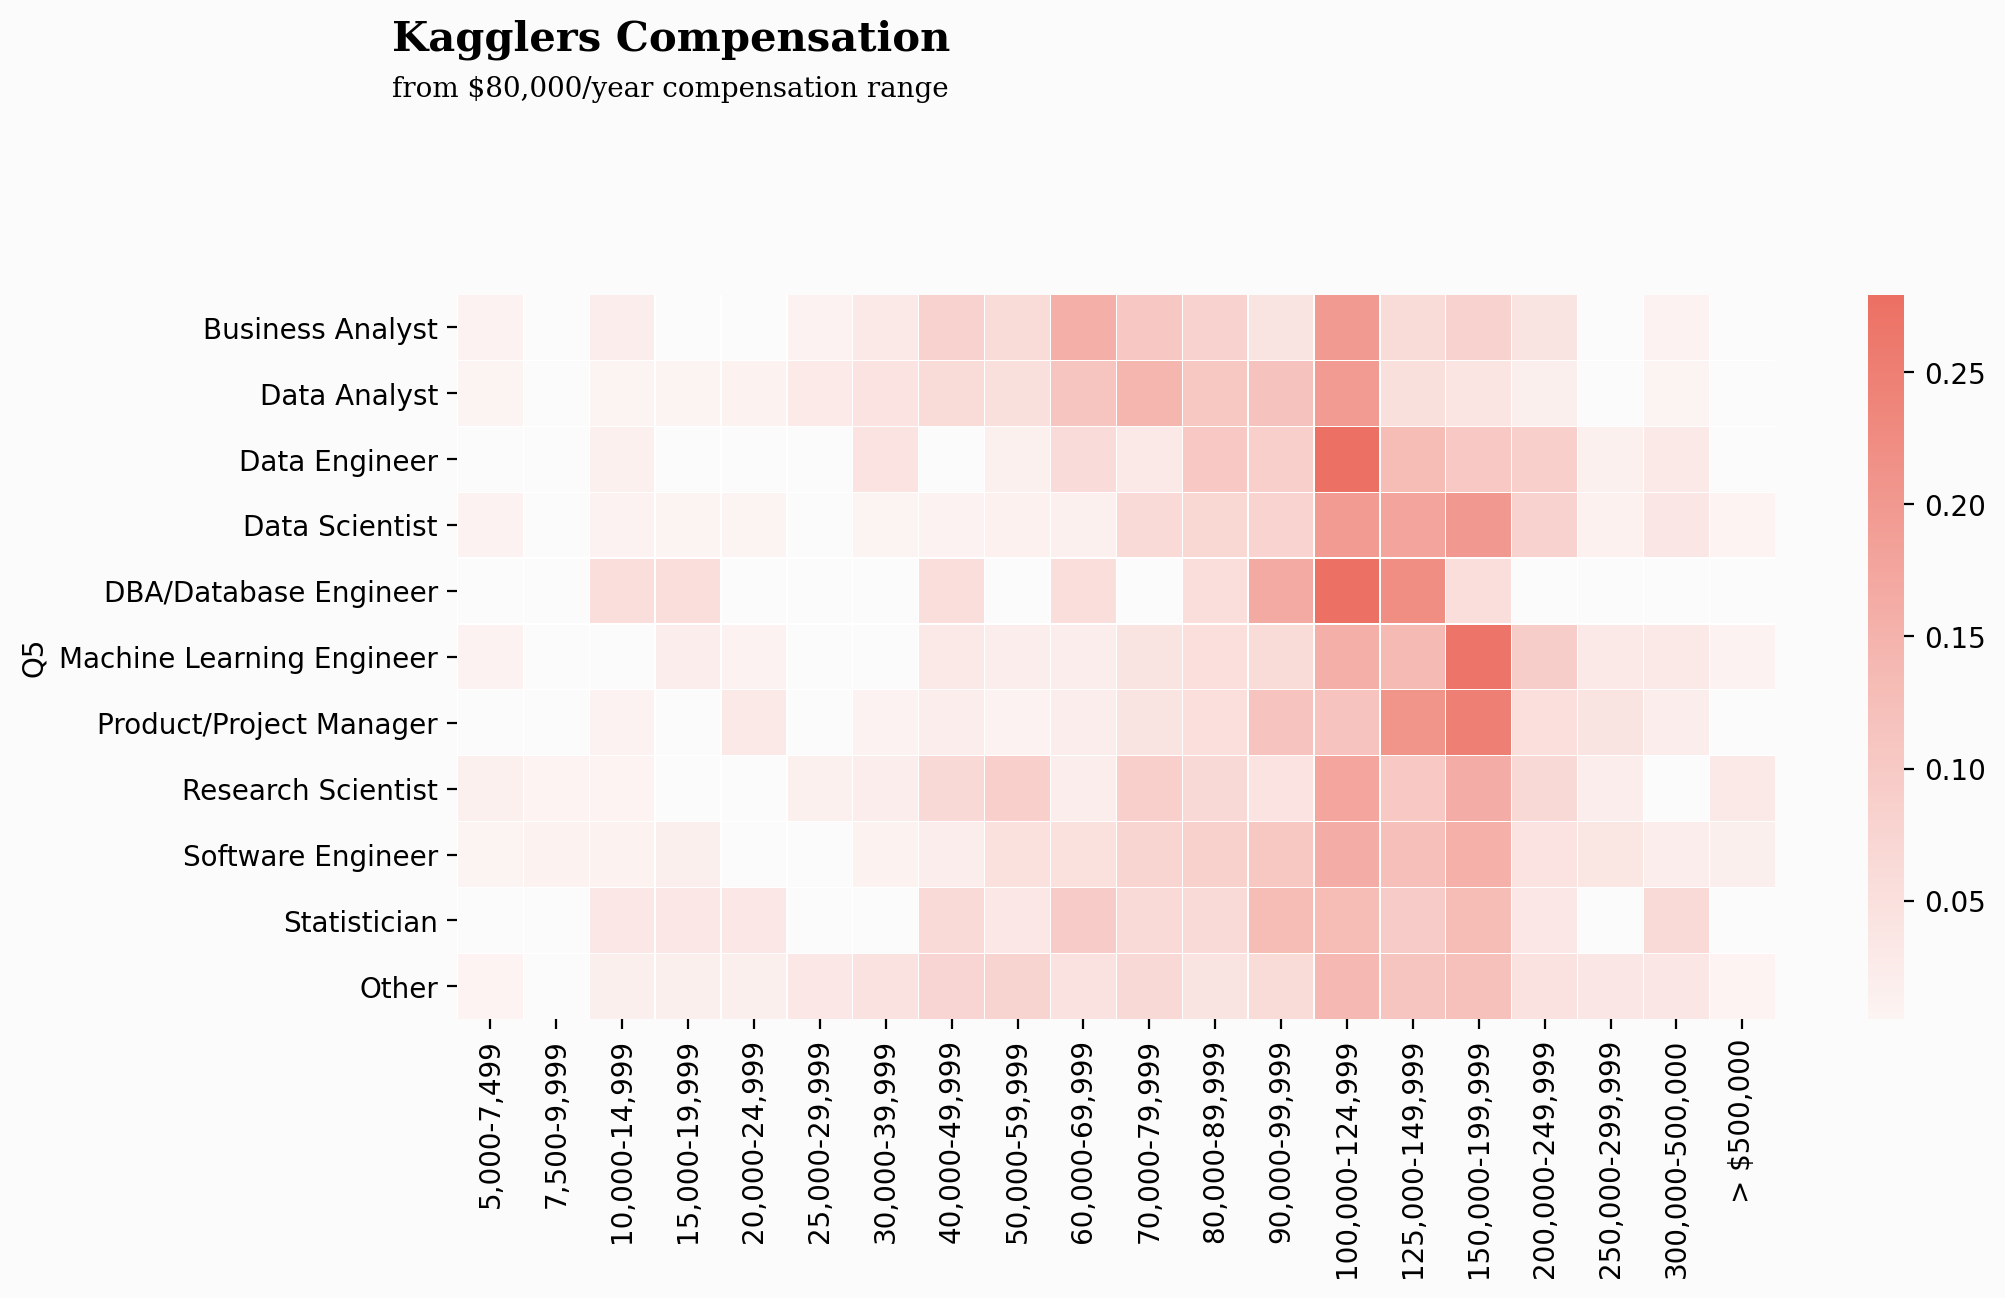

In [11]:
# compensation is categorized in the different scale. Also, the first three categories might come from false information gathering (confusion of montly or yearly), so I decide to select the range between 3000 to 500000

q24_order = [
    # "$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999",
    "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
    "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
    "50,000-59,999", "60,000-69,999", "70,000-79,999",
    "80,000-89,999", "90,000-99,999", "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-500,000", "> $500,000"]

df_q5q24 = df[['Q24', 'Q5']].dropna()
df_q5q24 = df_q5q24.groupby('Q5')['Q24'].value_counts().unstack()[q24_order].loc[q5_order]

df_q5q24 = (df_q5q24.T / (df_q5q24.sum(axis=1) + 0.001)).T

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=-0.75)
ax0 = fig.add_subplot(gs[0,0])

colors = ["#fcf4f3", "#f5b7b1", "#ec7063"]
colormap = mpl.colors.LinearSegmentedColormap.from_list("", colors)


sns.heatmap(ax=ax0, data=df_q5q24, linewidths=.1, square=True, 
            cbar_kws = dict(use_gridspec=False,location="right"), cmap=colormap)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.set_xlabel("")

ax0.text(-1., -3.7, 'Kagglers Compensation', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax0.text(-1., -3, 'from $80,000/year compensation range', 
         fontsize=10, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


<a id="skills"></a>
[back to top](#table-of-contents)

## 5. Want to Spark Up Your Data Skills?
6. [What is the top recommendations from Kagglers](#recommendations) 
7. [Take-Aways](#takeaways)
8. [References](#reference)

<a id="recommendations"></a>
[back to top](#table-of-contents)

## 6. What is the top recommendations from Kagglers? 
